In [1]:
from tensorflow.keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000
)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [9]:
#Model Definition

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
#Model Compilation

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [12]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data= (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 36s 1s/step - loss: 0.5099 - accuracy: 0.7944 - val_loss: 0.3881 - val_accuracy: 0.8651
Epoch 2/20
30/30 [==============================] - 4s 134ms/step - loss: 0.2963 - accuracy: 0.9037 - val_loss: 0.3334 - val_accuracy: 0.8648
Epoch 3/20
30/30 [==============================] - 4s 145ms/step - loss: 0.2186 - accuracy: 0.9287 - val_loss: 0.2781 - val_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 4s 124ms/step - loss: 0.1768 - accuracy: 0.9409 - val_loss: 0.2800 - val_accuracy: 0.8870
Epoch 5/20
30/30 [==============================] - 4s 120ms/step - loss: 0.1441 - accuracy: 0.9540 - val_loss: 0.2883 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 3s 116ms/step - loss: 0.1207 - accuracy: 0.9615 - val_loss: 0.2949 - val_accuracy: 0.8844
Epoch 7/20
30/30 [==============================] - 3s 115ms/step - loss: 0.1007 - accuracy: 0.9704 - val_loss: 0.3046 - val_accuracy: 0.8850
Epoch 8/

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

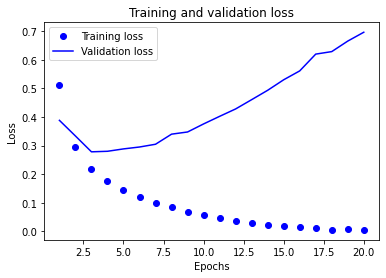

In [15]:
import matplotlib.pyplot as plt

history_dict = history.history

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(accuracy)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

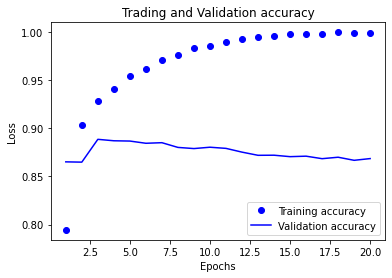

In [16]:
plt.clf()
accuracy_values = history.history['accuracy']
val_accuracy_values = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Trading and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 8s 156ms/step - loss: 0.4528 - accuracy: 0.8145
Epoch 2/4
49/49 [==============================] - 4s 91ms/step - loss: 0.2603 - accuracy: 0.9086
Epoch 3/4
49/49 [==============================] - 4s 85ms/step - loss: 0.1992 - accuracy: 0.9299
Epoch 4/4
782/782 [==============================] - 6s 8ms/step - loss: 0.2965 - accuracy: 0.8835


In [19]:
results

[0.29646244645118713, 0.8834800124168396]

In [ ]:
model.predict(x_test)